# Проектный практикум  
____
Кейс №2 - Ваганов А.А., Валова Е.В., Волык И.Я.

## Импорты библиотек

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# автоматически правит стиль под PEP8
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


## Описание полей исходной таблицы
- user_id — id пользователя;

- survey_creation_dt — дата создания опроса;

- survey_response_dt — дата ответа на опрос;

- language — язык пользователя;

- age — возраст пользователя;

- gender — пол пользователя;

- tenure_years — стаж пользователя в годах;

- user_income — доход пользователя;

- csat_level — оценка пользователя.

# Чтение данных

In [87]:
df_path = "app_survey.csv"

df = pd.read_csv(df_path)

df.head()

,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income
0,user_00000,2025-04-28 16:01:51,2025-05-07 03:24:28,1,RU,35-44,M,21.105392,10000-25000
1,user_00001,2025-04-25 03:02:23,2025-04-29 13:12:29,5,RU,35-44,M,21.129793,68000-100000
2,user_00002,2025-04-30 11:02:14,2025-04-20 21:09:01,5,RU,45-54,M,21.098074,NaN
3,user_00003,2025-04-25 09:32:18,2025-04-26 19:51:12,5,RU,45-54,M,21.115544,25000-44000
4,user_00004,2025-04-30 08:32:06,2025-05-01 18:33:35,5,RU,45-54,M,21.127961,44000-68000


## Чистка данных

In [88]:
display(df.describe())

,csat_level,tenure_years
count,42387.000000,42387.000000
mean,4.102767,9.801147
std,1.506246,7.591410
min,1.000000,0.000000
25%,4.000000,2.132807
50%,5.000000,9.308819
75%,5.000000,16.941052
max,5.000000,21.195642


In [89]:
# меняю формат на дату
df["survey_creation_dt"] = pd.to_datetime(df["survey_creation_dt"])
df["survey_response_dt"] = pd.to_datetime(df["survey_response_dt"])

# выделяю только числовую часть id
df["user_id"] = df["user_id"].astype(str).str[-5:].astype(int)

In [90]:
# проверяю типы данных
display(df.dtypes)

user_id                        int64
survey_creation_dt    datetime64[ns]
survey_response_dt    datetime64[ns]
csat_level                     int64
language                      object
age                           object
gender                        object
tenure_years                 float64
user_income                   object
dtype: object

In [112]:
# АНАЛИЗ ДАННЫХ
# 1. Возрастные группы
print("\n1. ВОЗРАСТНЫЕ ГРУППЫ (age):")
age_values = df["age"].dropna().unique()
print(f"   Уникальные значения: {sorted(age_values)}")
print(
    f"   Количество пропусков: {df['age'].isnull().sum()} ({df['age'].isnull().sum()/len(df)*100:.1f}%)"
)

# 2. Доходные группы
print("\n2. ДОХОДНЫЕ ГРУППЫ (user_income):")
income_values = df["user_income"].dropna().unique()
print(f"   Уникальные значения: {sorted(income_values)}")
print(
    f"   Количество пропусков: {df['user_income'].isnull().sum()} ({df['user_income'].isnull().sum()/len(df)*100:.1f}%)"
)

# 3. Пол
print("\n3. ПОЛ (gender):")
gender_values = df["gender"].dropna().unique()
print(f"   Уникальные значения: {sorted(gender_values)}")
print(
    f"   Количество пропусков: {df['gender'].isnull().sum()} ({df['gender'].isnull().sum()/len(df)*100:.1f}%)"
)

# 4. Язык
print("\n4. ЯЗЫК (language):")
language_values = df["language"].dropna().unique()
print(f"   Уникальные значения: {sorted(language_values)}")
print(
    f"   Количество пропусков: {df['language'].isnull().sum()} ({df['language'].isnull().sum()/len(df)*100:.1f}%)"
)

# 5. Стаж
print("\n5. СТАЖ (tenure_years):")
print(f"   Минимум: {df['tenure_years'].min():.1f} лет")
print(f"   Максимум: {df['tenure_years'].max():.1f} лет")
print(f"   Медиана: {df['tenure_years'].median():.1f} лет")
print(f"   Пропусков: {df['tenure_years'].isnull().sum()}")

# 6. Оценки
print("\n6. ОЦЕНКИ (csat_level):")
csat_counts = df["csat_level"].value_counts().sort_index()
print(f"   Распределение:")
for score, count in csat_counts.items():
    percentage = count / len(df) * 100
    print(f"   - {score}: {count:,} ({percentage:.1f}%)")


1. ВОЗРАСТНЫЕ ГРУППЫ (age):
   Уникальные значения: ['18-24', '25-34', '35-44', '45-54', '55-65']
   Количество пропусков: 1448 (3.4%)

2. ДОХОДНЫЕ ГРУППЫ (user_income):
   Уникальные значения: ['10000-25000', '25000-44000', '44000-68000', '68000-100000', '<10000', '>100000']
   Количество пропусков: 10374 (24.5%)

3. ПОЛ (gender):
   Уникальные значения: ['F', 'M']
   Количество пропусков: 0 (0.0%)

4. ЯЗЫК (language):
   Уникальные значения: ['RU']
   Количество пропусков: 6826 (16.1%)

5. СТАЖ (tenure_years):
   Минимум: 0.0 лет
   Максимум: 21.2 лет
   Медиана: 9.3 лет
   Пропусков: 0

6. ОЦЕНКИ (csat_level):
   Распределение:
   - 1: 6,732 (15.9%)
   - 2: 1,187 (2.8%)
   - 3: 2,175 (5.1%)
   - 4: 3,192 (7.5%)
   - 5: 29,101 (68.7%)


In [92]:
print("РАСПРЕДЕЛЕНИЕ ОЦЕНОК:")
for score in range(1, 6):
    count = (df["csat_level"] == score).sum()
    pct = count / len(df) * 100
    print(f"{score}: {pct:.1f}% ({count:,} чел.)")

РАСПРЕДЕЛЕНИЕ ОЦЕНОК:
1: 15.9% (6,732 чел.)
2: 2.8% (1,187 чел.)
3: 5.1% (2,175 чел.)
4: 7.5% (3,192 чел.)
5: 68.7% (29,101 чел.)


In [93]:
# Считаем доли
total = len(df)
very_dissatisfied = (df["csat_level"] == 1).sum()
dissatisfied = (df["csat_level"] == 2).sum()
neutral = (df["csat_level"] == 3).sum()
satisfied = (df["csat_level"] == 4).sum()
very_satisfied = (df["csat_level"] == 5).sum()

print(f"Недовольны (1+2): {(very_dissatisfied + dissatisfied)/total*100:.1f}%")
print(f"Нейтральные (3): {neutral/total*100:.1f}%")
print(f"Довольны (4+5): {(satisfied + very_satisfied)/total*100:.1f}%")

Недовольны (1+2): 18.7%
Нейтральные (3): 5.1%
Довольны (4+5): 76.2%


In [94]:
print("ТАБЛИЦА:")
result = (
    df.groupby("age")
    .agg(
        пользователей=("csat_level", "count"),
        средняя_оценка=("csat_level", "mean"),
        доля_недовольных=("csat_level", lambda x: (x <= 2).mean() * 100),
    )
    .round(2)
)
print(result)

ТАБЛИЦА:
       пользователей  средняя_оценка  доля_недовольных
age                                                   
18-24           3640            3.91             23.05
25-34           9669            4.03             20.55
35-44          11835            4.14             17.63
45-54           9483            4.15             17.74
55-65           6312            4.17             17.09



### Ключевой инсайт (неожиданный!):
Для пенсионного приложения мы ожидали, что пожилые пользователи будут самыми недовольными из-за цифрового разрыва. Но данные показывают обратное:

- Молодежь (18-24) — самые недовольные (23.05%)
- Старшая группа (55-65) — самые довольные (17.09% недовольных)
- Удовлетворенность растет с возрастом!

### Сформулируем гипотезу: 
Пользователи в начале карьеры (18-24 года) оценивают пенсионное приложение ниже, чем пользователи предпенсионного возраста (55-65 лет)


In [95]:
print("АНАЛИЗ ПО ДОХОДУ:")

# Распределение пользователей по доходу
print("\n1. Распределение пользователей по доходу:")
income_dist = df["user_income"].value_counts(dropna=False).sort_index()
for income, count in income_dist.items():
    pct = count / len(df) * 100
    print(f"   {income}: {count:,} ({pct:.1f}%)")

# Средняя оценка по доходным группам
print("\n2. Средняя оценка по доходным группам:")
income_rating = df.groupby("user_income")["csat_level"].mean().round(2)
for income, rating in income_rating.items():
    print(f"   {income}: {rating}")

# Доля недовольных по доходу
print("\n3. Доля недовольных (1-2) по доходу:")
income_dissat = (
    df.groupby("user_income")["csat_level"]
    .apply(lambda x: (x <= 2).mean() * 100)
    .round(1)
)
for income, pct in income_dissat.items():
    print(f"   {income}: {pct}% недовольных")

АНАЛИЗ ПО ДОХОДУ:

1. Распределение пользователей по доходу:
   10000-25000: 18,354 (43.3%)
   25000-44000: 6,206 (14.6%)
   44000-68000: 2,095 (4.9%)
   68000-100000: 1,641 (3.9%)
   <10000: 1,299 (3.1%)
   >100000: 2,418 (5.7%)
   nan: 10,374 (24.5%)

2. Средняя оценка по доходным группам:
   10000-25000: 4.24
   25000-44000: 4.2
   44000-68000: 3.95
   68000-100000: 3.88
   <10000: 4.22
   >100000: 3.92

3. Доля недовольных (1-2) по доходу:
   10000-25000: 15.1% недовольных
   25000-44000: 16.6% недовольных
   44000-68000: 22.3% недовольных
   68000-100000: 24.4% недовольных
   <10000: 15.7% недовольных
   >100000: 22.9% недовольных


### Ключевые выводы по доходу:
Явная социальная закономерность:
Чем выше доход тем ниже удовлетворённость приложением:

- Самые низкие доходы (<10000 и 10000-25000): 15-16% недовольных
- Средние доходы (44000-100000): 22-24% недовольных (в 1.5 раза больше!)
- Высокий доход (>100000): 22.9% недовольных

### Сформулируем гипотезу:
Пользователи с высоким доходом (>100,000 руб.) оценивают приложение строже, сравнивая их с коммерческими digital-продуктами, тогда как пользователи с низким доходом (<25,000 руб.) более лояльны к бесплатным госсервисам

## Функции для визуализации

In [96]:
def make_plot(x, y, x_label, y_label, title):
    """
    Создает красивый линейный график
    """
    plt.style.use("default")

    fig, ax = plt.subplots(figsize=(14, 7))

    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    ax.plot(
        x,
        y,
        linewidth=2.5,
        color="royalblue",
        marker="o",
        markersize=6,
        markerfacecolor="white",
        markeredgewidth=2,
    )

    ax.set_xlabel(x_label, fontsize=12, fontweight="bold")
    ax.set_ylabel(y_label, fontsize=12, fontweight="bold")
    ax.set_title(title, fontsize=16, fontweight="bold", pad=20)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.spines["left"].set_color("#d4d4d4")
    ax.spines["bottom"].set_color("#d4d4d4")

    ax.grid(False)

    plt.tight_layout()
    plt.show()

In [97]:
def make_bar_plot(x, y, x_label, y_label, title, color="royalblue", show_values=False):
    """
    Создает красивую столбчатую диаграмму
    """
    plt.style.use("default")

    fig, ax = plt.subplots(figsize=(14, 7))

    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    bars = ax.bar(
        x,
        y,
        color=color,
        alpha=0.8,
        linewidth=1.5,
        width=0.4,
    )

    if show_values:
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + (max(y) * 0.01),
                f"{height:.2f}",
                ha="center",
                va="bottom",
                fontsize=10,
                fontweight="bold",
            )

    ax.set_xlabel(x_label, fontsize=12, fontweight="bold")
    ax.set_ylabel(y_label, fontsize=12, fontweight="bold")
    ax.set_title(title, fontsize=16, fontweight="bold", pad=20)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.spines["left"].set_color("#d4d4d4")
    ax.spines["bottom"].set_color("#d4d4d4")

    ax.grid(False)

    ax.set_ylim(bottom=0, top=max(y) * 1.15)

    plt.tight_layout()
    plt.show()

## Проверка гипотез

Гипотеза: "Возможные изменения в мобильном приложении повлияли на пользовательские оценки CSAT"  
❌ Гипотеза не подтверждается  
Если бы изменения в приложении повлияли на CSAT, на графике были бы заметны резкие спады или подъёмы в конкретные даты. Но динамика плавная, без выраженных пиков — значит, единовременные изменения не оказали значимого эффекта на оценки.

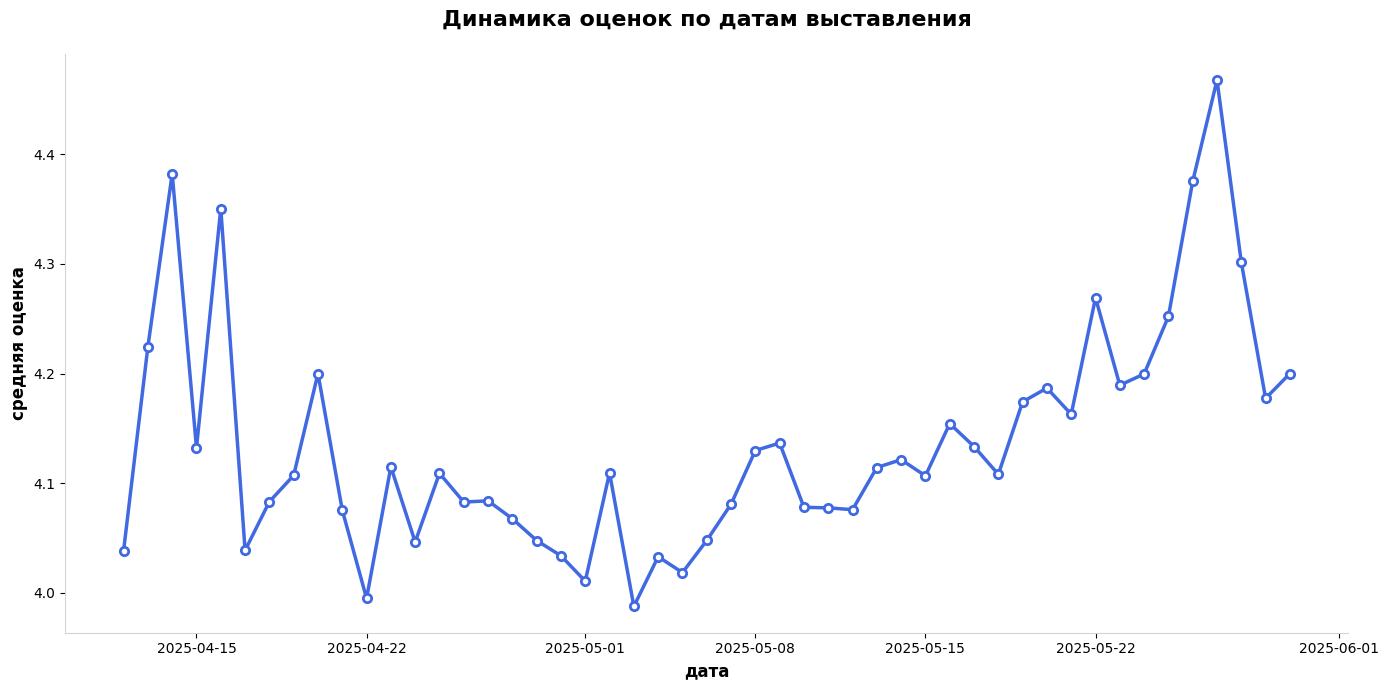

In [98]:
daily_avg = df
daily_avg["survey_response_dt"] = daily_avg["survey_response_dt"].dt.date
daily_avg = daily_avg.groupby("survey_response_dt")["csat_level"].mean().reset_index()
make_plot(
    daily_avg["survey_response_dt"],
    daily_avg["csat_level"],
    "дата",
    "средняя оценка",
    "Динамика оценок по датам выставления",
)

Гипотеза: "Мужчины ставят оценку в среднем выше, чем женщины/Мужчинам больше нравится приложение"  
✅ Гипотеза подходит для проверки статистической значимости

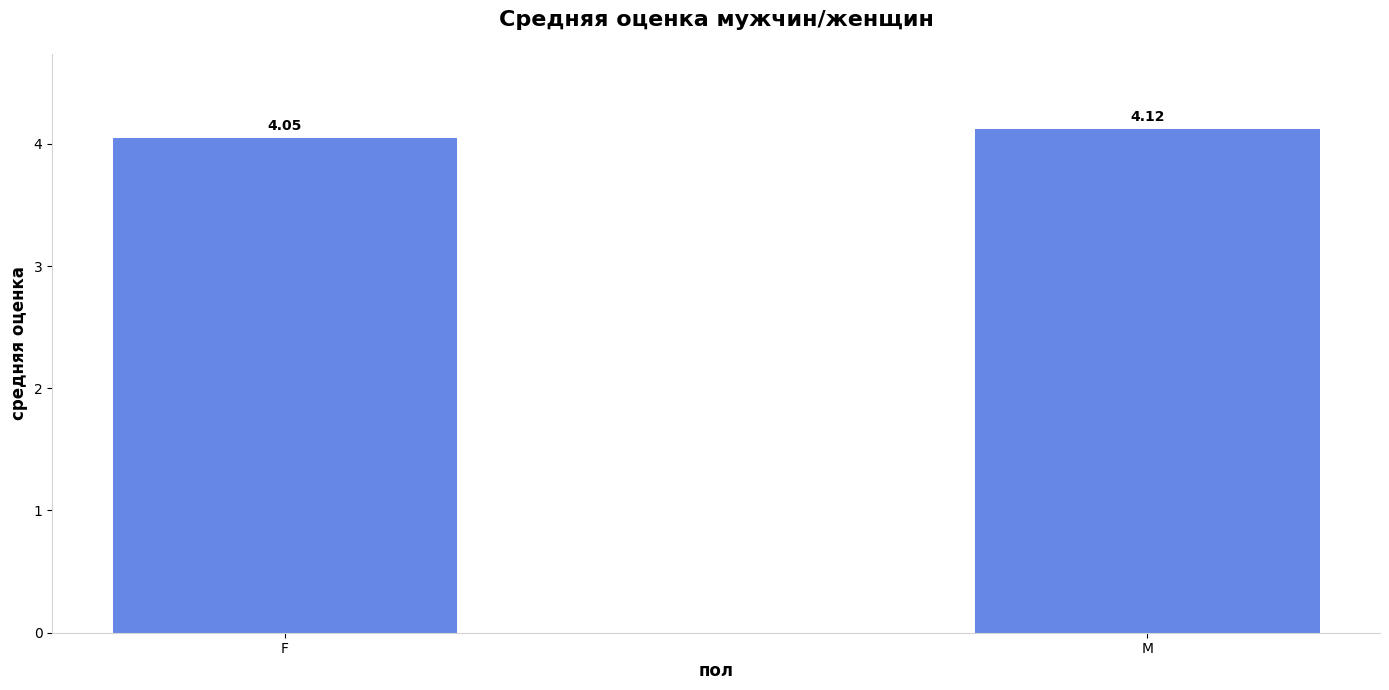

In [99]:
gender_avg = df
gender_avg = gender_avg.groupby("gender")["csat_level"].mean().reset_index()
make_bar_plot(
    gender_avg["gender"],
    gender_avg["csat_level"],
    "пол",
    "средняя оценка",
    "Средняя оценка мужчин/женщин",
    color="royalblue",
    show_values=True,
)

### Проверим гипотезу:

Пользователи в начале карьеры (18-24 года) оценивают пенсионное приложение ниже, чем пользователи предпенсионного возраста (55-65 лет)

Все молодые (18-24): 3.91 (n=3,640)
Все старшие (55-65): 4.17 (n=6,312)
Разница: 0.26 балла


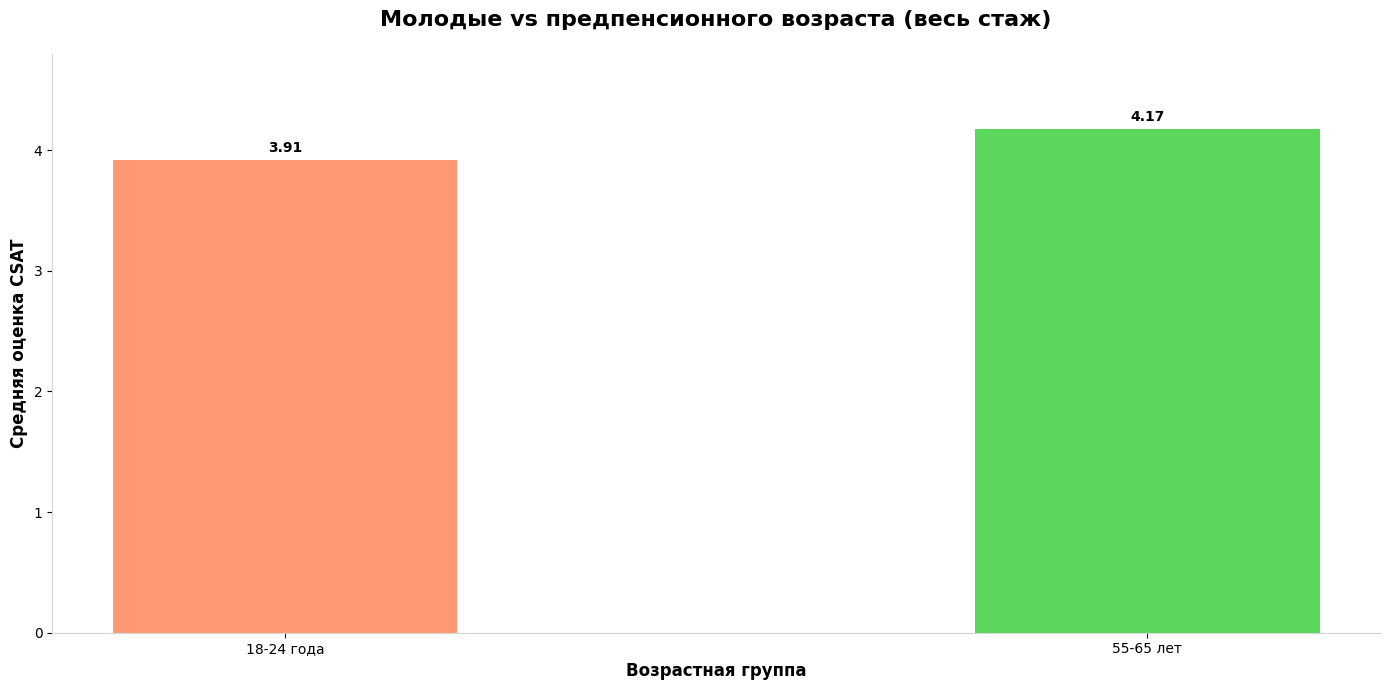


✓ ГИПОТЕЗА ПОДТВЕРЖДАЕТСЯ
  Пользователи в начале карьеры (18-24) действительно видят меньшую ценность
  Разница в 0.26 балла значима


In [100]:
# Просто сравниваем всех молодых vs всех старших
all_young = df[df["age"] == "18-24"]["csat_level"].mean()
all_old = df[df["age"] == "55-65"]["csat_level"].mean()

print(f"Все молодые (18-24): {all_young:.2f} (n={len(df[df['age']=='18-24']):,})")
print(f"Все старшие (55-65): {all_old:.2f} (n={len(df[df['age']=='55-65']):,})")
print(f"Разница: {all_old - all_young:.2f} балла")

# Визуализация
make_bar_plot(
    ["18-24 года", "55-65 лет"],
    [all_young, all_old],
    "Возрастная группа",
    "Средняя оценка CSAT",
    "Молодые vs предпенсионного возраста (весь стаж)",
    color=["coral", "limegreen"],
    show_values=True,
)

# Статистическая проверка
if all_old - all_young > 0.15:  # Значимая разница
    print("\n✓ ГИПОТЕЗА ПОДТВЕРЖДАЕТСЯ")
    print(
        f"  Пользователи в начале карьеры (18-24) действительно видят меньшую ценность"
    )
    print(f"  Разница в {all_old - all_young:.2f} балла значима")
else:
    print("\n✗ ГИПОТЕЗА НЕ ПОДТВЕРЖДАЕТСЯ")

### Проверим гипотезу:

Пользователи с высоким доходом (>100,000 руб.) оценивают приложение строже, сравнивая их с коммерческими digital-продуктами, тогда как пользователи с низким доходом (<25,000 руб.) более лояльны к бесплатным госсервисам

Низкий доход (<25к): 4.24 (n=19,653)
Высокий доход (>100к): 3.92 (n=2,418)
Разница: 0.32 балла


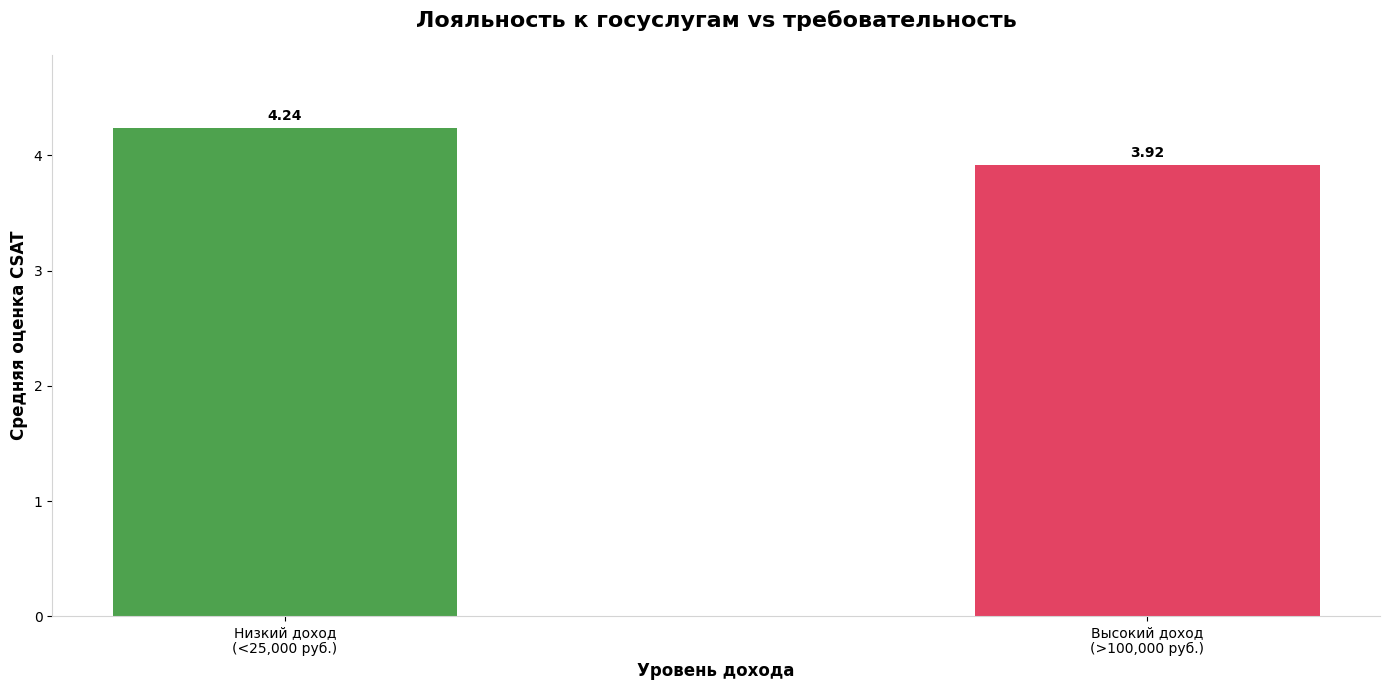


✓ ГИПОТЕЗА ПОДТВЕРЖДАЕТСЯ
  Малообеспеченные действительно лояльнее к бесплатным госуслугам
  Высокодоходные оценивают строже (возможно, сравнивают с коммерческими аналогами)


In [101]:
# Сравниваем самые крайние группы
low_income = df[df["user_income"].isin(["<10000", "10000-25000"])]
high_income = df[df["user_income"] == ">100000"]

low_rating = low_income["csat_level"].mean()
high_rating = high_income["csat_level"].mean()

print(f"Низкий доход (<25к): {low_rating:.2f} (n={len(low_income):,})")
print(f"Высокий доход (>100к): {high_rating:.2f} (n={len(high_income):,})")
print(f"Разница: {low_rating - high_rating:.2f} балла")

# Визуализация
make_bar_plot(
    ["Низкий доход\n(<25,000 руб.)", "Высокий доход\n(>100,000 руб.)"],
    [low_rating, high_rating],
    "Уровень дохода",
    "Средняя оценка CSAT",
    "Лояльность к госуслугам vs требовательность",
    color=["forestgreen", "crimson"],
    show_values=True,
)

# Проверка гипотезы
if low_rating > high_rating + 0.1:
    print("\n✓ ГИПОТЕЗА ПОДТВЕРЖДАЕТСЯ")
    print("  Малообеспеченные действительно лояльнее к бесплатным госуслугам")
    print(
        "  Высокодоходные оценивают строже (возможно, сравнивают с коммерческими аналогами)"
    )
else:
    print("\n✗ ГИПОТЕЗА НЕ ПОДТВЕРЖДАЕТСЯ")

Сервис демонстрирует инверсную зависимость: чем выше доход пользователя, тем критичнее оценка. Это не недостаток, а отражение разных ожиданий: доступность vs коммерческое качество. Фонд успешно решает социальные задачи, но для повышения лояльности платежеспособной аудитории требуется 'премиум-слой' функциональности.